# Insurance Cost Prediction

In [128]:
import pandas as pd

In [129]:
data = pd.read_csv('./insurance.csv')

#### 1. Display top 5 rows of the dataset

In [130]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 2. Check last 5 rows of the dataset

In [131]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


#### 3. find shape of our dataset

In [132]:
data.shape

(1338, 7)

#### 4. Get information about dataset like total number of rows, total number of columns, datatypes of each column and memory requirement

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### 5. check Null values in the dataset

In [134]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 6. get overall statistics about dataset

In [135]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 7. convert columns from string['sex', 'smoker','region'] to numerical values

In [136]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [137]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [138]:
data['sex']=data['sex'].map({'female':0,'male':1})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [139]:
data['smoker']=data['smoker'].map({'no':0,'yes':1})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [140]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [141]:
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


#### 8. store feature matrix in X and Target in vector y

In [142]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [143]:
X = data.drop(['charges'],axis=1)
y = data['charges']

#### 9. Train Test Split

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### 10.import models

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### 11. model training

In [147]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

#### 12. prediction on test data

In [148]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test, 'LR':y_pred1, 'SVM': y_pred2, 'RF': y_pred3, 'GR': y_pred4})

In [149]:
df1

,Actual,LR,SVM,RF,GR
764,9095.06825,8924.407244,9548.261584,11317.104119,11001.128629
887,5272.17580,7116.295018,9492.515425,4952.317285,5840.174656
890,29330.98315,36909.013521,9648.758701,28338.940895,28001.980112
1293,9301.89355,9507.874691,9555.044136,11202.690637,9745.291602
259,33750.29180,27013.350008,9420.421978,34410.111731,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46650.026309,45431.423211
575,12222.89830,11814.555568,9625.431547,13007.582852,12465.025294
535,6067.12675,7638.107736,9504.168517,6557.123436,6974.336525
543,63770.42801,40959.081722,9605.004594,46903.251140,47862.047791


#### 12. compare performance of the model visually

In [150]:
import matplotlib.pyplot as plt

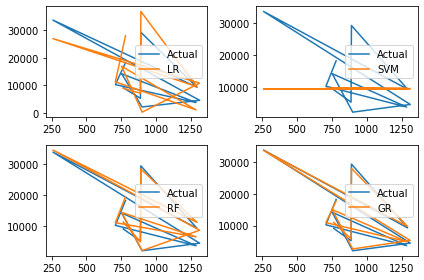

In [151]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['LR'].iloc[0:11], label="LR")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['SVM'].iloc[0:11], label="SVM")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['RF'].iloc[0:11], label="RF")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['GR'].iloc[0:11], label="GR")
plt.legend()

plt.tight_layout()

#### 14. Evaluating the algorithm

In [152]:
from sklearn import metrics

In [153]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

print(score1, score2, score3, score4)

0.7833463107364539 -0.07229762787861826 0.862694446006587 0.8779726251291786


In [154]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)

print(s1, s2, s3, s4)

4186.508898366434 8592.428727899724 2529.194444249037 2447.9515580545844


#### 15. Predict charges for new customer

In [155]:
data = {'age':40, 'sex': 1,'bmi':40.30, 'children':4, 'smoker':1, 'region':2 }
df = pd.DataFrame(data, index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [156]:
new_pred = gr.predict(df)
new_pred

array([43839.34586293])

#### 16. save model using joblib

In [157]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [158]:
import joblib

In [159]:
joblib.dump(gr, 'insurance cost prediction')

['insurance cost prediction']

In [160]:
model = joblib.load('insurance cost prediction')

In [161]:
model.predict(df)

array([42148.361888])

#### 17. GUI

In [162]:
from tkinter import *

In [163]:
import joblib

In [164]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load('insurance cost prediction')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])

    Label(master, text="insurance cost prediction").grid(row=7)
    Label(master, text=result).grid(row=8)



master = Tk()
master.title('insurance cost prediction')
label = Label(master, text="insurance cost prediction" ,bg = 'black', fg = 'white').grid(row=0, columnspan=2)

Label(master, text="Enter your age").grid(row=1)
Label(master, text="Male or Female [1/0]").grid(row=2)
Label(master, text="Enter your BMI value").grid(row=3)
Label(master, text="Enter number of children").grid(row=4)
Label(master, text="Smoker Yes/No [1/0]").grid(row=5)
Label(master, text="Region [1-4]").grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

Button(master, text="Predict", command=show_entry).grid()

mainloop()